In [158]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [159]:
import matplotlib.pyplot as plt

In [160]:
wine = load_wine()

In [161]:
raw_data = pd.DataFrame(wine.data,columns=wine.feature_names)

In [162]:
raw_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_data.copy())

In [165]:
scaled_data = pd.DataFrame(scaled_data,columns=raw_data.columns)

In [166]:
scaled_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [167]:
target = pd.DataFrame(wine.target,columns=['Type'])
data_target = pd.concat([scaled_data,target],axis=1)

In [168]:
data_target

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Type
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2


In [169]:
data_0 = data_target[data_target['Type'] == 0]
data_1 = data_target[data_target['Type'] == 1]
data_2 = data_target[data_target['Type'] == 2]

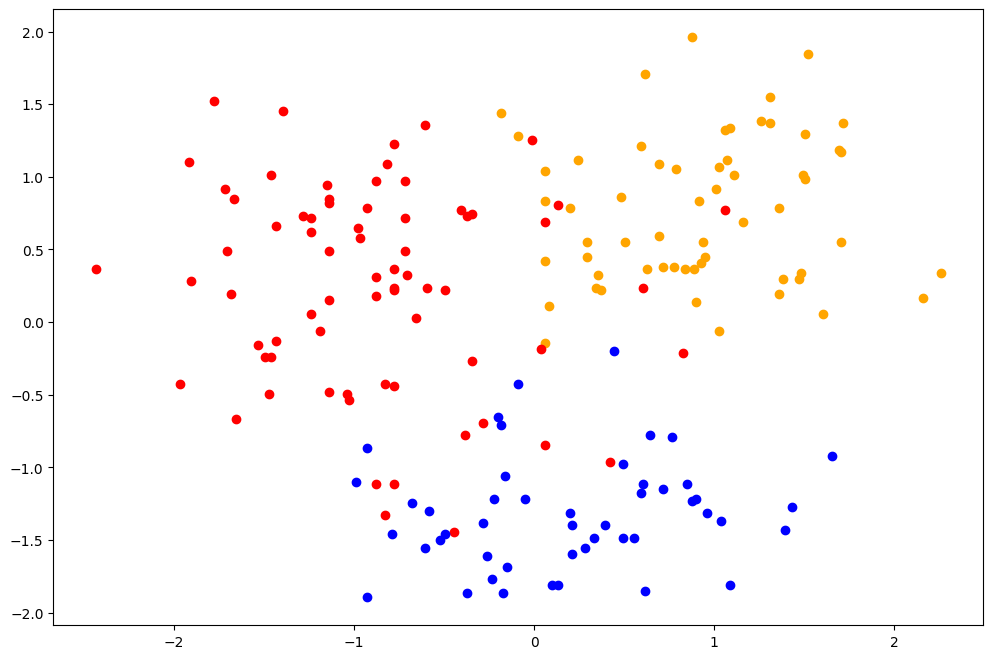

In [170]:
plt.figure(figsize=(12,8))
plt.plot(data_0['alcohol'],data_0['od280/od315_of_diluted_wines'],'o',color='orange')
plt.plot(data_1['alcohol'],data_1['od280/od315_of_diluted_wines'],'o',color='red')
plt.plot(data_2['alcohol'],data_2['od280/od315_of_diluted_wines'],'o',color='blue')

In [201]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,wine.target,test_size=0.2)

In [202]:
parameters = {
    'kernel' : ['linear','poly','rbf'],
    'C' : [2,1,2.5],
    'gamma' : [0.025,0.05,0.75]
}

In [203]:

gs = GridSearchCV(SVC(),parameters,cv=4)
gs.fit(scaled_data,wine.target)
    

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [2, 1, 2.5], 'gamma': [0.025, 0.05, 0.75],
                         'kernel': ['linear', 'poly', 'rbf']})

In [204]:
gs.best_params_

{'C': 2, 'gamma': 0.05, 'kernel': 'rbf'}

In [205]:
model_svc = SVC(C=2,gamma = 0.05, kernel='rbf')
model_svc.fit(X_train,y_train)

SVC(C=2, gamma=0.05)

In [206]:
model_svc.score(X_train,y_train)

1.0

In [207]:
model_svc.score(X_test,y_test)

1.0

In [208]:
model = SVC()
model.fit(X_train,y_train)
model.score(X_train,y_train)

1.0

In [209]:
model.score(X_test,y_test)

1.0